# Projeto Ciência de Dados - Previsão de Preços

- Nosso desafio é conseguir prever o preço de barcos que vamos vender baseado nas características do barco, como: ano, tamanho, tipo de barco, se é novo ou usado, qual material usado, etc.

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=share_link

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

![title](tabelas.png)

### Vamos extrair os dados
- A princípio utilizaremos o csv da tabela barcos_ref. 

In [58]:
# Extração/Obtenção de Dados
import pandas as pd
tabela = pd.read_csv("barcos_ref.csv")
display(tabela)

,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,3490,1,1,2020,4.00,1.50,1
1,3399,2,1,2019,3.55,1.46,2
2,3600,3,2,1999,6.20,2.38,2
3,3500,2,2,1987,4.35,1.75,3
4,3500,4,2,2004,4.70,2.00,3
...,...,...,...,...,...,...,...
7644,5000,7,2,1974,7.20,2.70,3
7645,4999,4,2,1980,6.00,2.10,3
7646,4950,2,2,1984,6.00,1.62,5
7647,4499,4,1,2020,4.40,1.80,3


### Ajuste de dados
- Aqui não precisaremos ajustar nada, mas abaixo verificaremos <br>se os dados estão compatíveis com os tipos.

In [59]:
# Ajuste de Dados (Tratamento/Limpeza)
display(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7649 entries, 0 to 7648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Preco        7649 non-null   int64  
 1   TipoBarco    7649 non-null   int64  
 2   TipoVenda    7649 non-null   int64  
 3   Ano          7649 non-null   int64  
 4   Comprimento  7649 non-null   float64
 5   Largura      7649 non-null   float64
 6   Material     7649 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 418.4 KB


None

### Análise Exploratória
- Aqui começaremos a ánalisar a tabela, analisaremos a correlação entre o preço e as características do barco.

In [60]:
# Análise Exploratória

correlacao = tabela.corr()[["Preco"]]
display(correlacao)

,Preco
Preco,1.00
TipoBarco,0.29
TipoVenda,0.04
Ano,0.11
Comprimento,0.58
Largura,0.56
Material,-0.04


### Gráfico da correlação
- Aqui criamos o gráfico da correlação para um melhor entendimento.

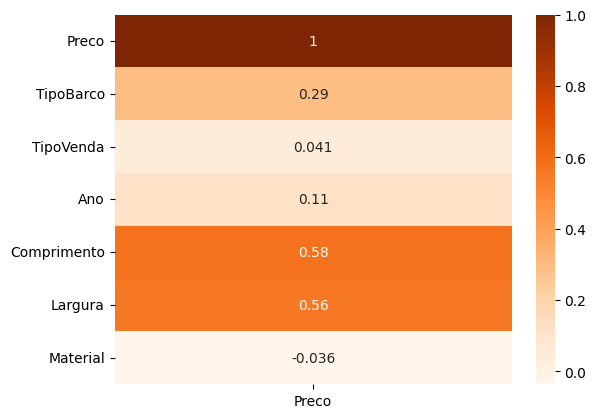

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

#Cria o gráfico
sns.heatmap(correlacao, cmap="Oranges", annot=True)
#Exibe o gráfico
plt.show()

### Ánalise Completa
- Percebemos que o comprimento e a largura do barco são os fatores que mais influenciam no preço final.


### Dividindo os dados para receber a inteligência artificial
- Aqui dividimos nossa base de dados entre, treino e teste.

In [62]:
# Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial)
# As inteligências artificiais trabalham APENAS com números, por isso temos uma tabela que traduz!
# Dividir a base entre X e Y
y = tabela["Preco"] #Objetivo (O que queremos prever)
#drop retira, axis = 1 -> A coluna, axis = 0 -> A linha
x = tabela.drop("Preco", axis=1) #Dados para análisar (Caracteristicas que podem impactar no preço)
#train test split
#sklearn.model_selection to install %pip install numpy scipy scikit-learn
from sklearn.model_selection import train_test_split
#Treino 70% da base de dados, recomendação de 60% a 80% pra treino
#Teste 30% (test_size=0.3) da base de dados, recomendação de 20% a 40% pra teste 
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.3, random_state=1)
#Quanto mais informações (mais teste) mais precisa a previsão sera.
#(random_state = 1) roda a base só uma vez

### Criação das inteligências artificiais
- Criaremos duas inteligências artificiais que preve o preço de novos barcos.

In [63]:
#Importar a inteligência artificial
# Regressão linear e Árvore De Decisão
#NeuralNetwork chatGPT
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
#Criar a inteligencia artificial
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()
#Treinar a inteligencia artificial
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

### Verificamos a precisão da IA
- Aqui verificamos qual das duas IA utilizadas é mais precisa.

In [64]:
# Interpretação de resultado
#Escolher o melhor modelo -> R^2  Percentual de precisão
from sklearn.metrics import r2_score
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

print(r2_score(y_teste, previsao_regressaolinear))
print(r2_score(y_teste, previsao_arvoredecisao))
#Comparando, o melhor modelo para esse exemplo, é a árvore de decisão
#Árvore de decisão tem o maior score de acerto

0.4490324760735813
0.8549628362797858


### Gráfico de precisão
- Criaremos um gráfico de precisão entre as duas IA para uma melhor comparação.

<function matplotlib.pyplot.show(close=None, block=None)>

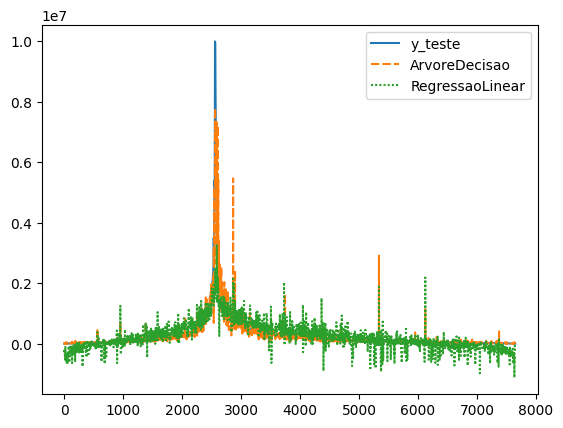

In [65]:
# Visualizar as previsões
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["ArvoreDecisao"] = previsao_arvoredecisao
tabela_auxiliar["RegressaoLinear"] = previsao_regressaolinear

sns.lineplot(data=tabela_auxiliar)
plt.show

### Colocamos a IA mais precisa para fazer as previsões
- Utilizaremos a IA com o mátodo de árvore de decisão par fazer as previsões, já que ela é a mais precisa.

In [66]:
# Fazer novas previsões
def formatar(valor):
    return "€{:,.2f}".format(valor) # formatado
tabela_nova = pd.read_csv("novos_barcos.csv")
previsao = modelo_arvoredecisao.predict(tabela_nova)
tabela_nova['Preço']=previsao
#pd.set_option('float_format','{:.3f}'.format)
tabela_nova['Preço'] = tabela_nova['Preço'].apply(formatar)
display(tabela_nova)

#print(previsao)

,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material,Preço
0,2,3,2023,3.00,1.50,1,"€6,176.32"
1,2,1,2023,3.80,1.90,2,"€8,287.84"
2,3,2,1999,6.20,3.00,2,"€19,491.10"


### Fazendo download da base de dados com as previsões
- Fazendo download da base de dados no formato exel, com as previsões.

In [ ]:
tabela_nova.to_excel("novos_precos.xlsx", index=False)